In [24]:
import numpy as np
import pandas as pd
from scipy import interpolate

In [25]:
df1 = pd.read_csv('/home/obin/Desktop/Project/Dataset/Weather/HomeF/homeF2014.csv')
df2 = pd.read_csv('/home/obin/Desktop/Project/Dataset/Weather/HomeF/homeF2015.csv')
df3 = pd.read_csv('/home/obin/Desktop/Project/Dataset/Weather/HomeF/homeF2016.csv')

In [26]:
df = pd.concat([df1,df2,df3])

In [27]:
df.shape

(26280, 15)

In [28]:
df.head()

,time_us,time,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1388552400,1388534400,20.85,clear-night,0.46,10.0,Clear,8.33,1023.40,12.83,0.0,284.0,0.0,3.36,0.0
1,1388556000,1388538000,19.72,clear-night,0.47,10.0,Clear,8.49,1023.36,10.03,0.0,285.0,0.0,2.94,0.0
2,1388559600,1388541600,18.75,clear-night,0.51,10.0,Clear,8.99,1024.41,7.65,0.0,257.0,0.0,3.62,0.0
3,1388563200,1388545200,17.97,clear-night,0.55,10.0,Clear,8.16,1025.14,7.50,0.0,244.0,0.0,4.39,0.0
4,1388566800,1388548800,15.73,clear-night,0.61,10.0,Clear,7.26,1025.27,5.62,0.0,213.0,0.0,4.56,0.0


In [29]:
df['time'] = pd.to_datetime(df['time'],unit='s')

#df['time'] = (df['time'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [30]:
df.tail()

,time_us,time,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
8755,1483142400,2016-12-30 19:00:00,37.57,partly-cloudy-night,0.73,9.65,Mostly Cloudy,30.19,1013.10,11.03,0.82,186.0,0.0000,29.89,0.00
8756,1483146000,2016-12-30 20:00:00,38.28,partly-cloudy-night,0.71,9.02,Partly Cloudy,30.54,1013.02,12.35,0.31,197.0,0.0011,29.73,0.02
8757,1483149600,2016-12-30 21:00:00,36.74,rain,0.81,8.98,Light Rain,28.54,1012.47,12.53,0.31,199.0,0.0124,31.40,0.53
8758,1483153200,2016-12-30 22:00:00,35.94,rain,0.84,8.39,Light Rain,29.62,1012.09,8.06,0.31,198.0,0.0161,31.52,0.57
8759,1483156800,2016-12-30 23:00:00,34.99,rain,0.88,8.73,Light Rain,29.47,1011.65,6.45,0.31,186.0,0.0153,31.84,0.56


In [31]:
df.set_index('time',inplace =True)

In [32]:
df

,time_us,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,
2014-01-01 00:00:00,1388552400,20.85,clear-night,0.46,10.00,Clear,8.33,1023.40,12.83,0.00,284.0,0.0000,3.36,0.00
2014-01-01 01:00:00,1388556000,19.72,clear-night,0.47,10.00,Clear,8.49,1023.36,10.03,0.00,285.0,0.0000,2.94,0.00
2014-01-01 02:00:00,1388559600,18.75,clear-night,0.51,10.00,Clear,8.99,1024.41,7.65,0.00,257.0,0.0000,3.62,0.00
2014-01-01 03:00:00,1388563200,17.97,clear-night,0.55,10.00,Clear,8.16,1025.14,7.50,0.00,244.0,0.0000,4.39,0.00
2014-01-01 04:00:00,1388566800,15.73,clear-night,0.61,10.00,Clear,7.26,1025.27,5.62,0.00,213.0,0.0000,4.56,0.00
2014-01-01 05:00:00,1388570400,15.61,clear-night,0.62,10.00,Clear,6.73,1025.58,5.98,0.00,215.0,0.0000,4.87,0.00
2014-01-01 06:00:00,1388574000,15.55,clear-night,0.65,10.00,Clear,6.12,1026.35,6.51,0.00,217.0,0.0000,5.89,0.00
2014-01-01 07:00:00,1388577600,15.75,clear-night,0.65,10.00,Clear,7.07,1026.87,5.82,0.04,207.0,0.0000,5.98,0.00
2014-01-01 08:00:00,1388581200,15.53,clear-day,0.67,10.00,Clear,6.61,1027.67,6.00,0.00,228.0,0.0000,6.51,0.00


In [33]:
df.isna().sum()

time_us                   0
temperature               0
icon                      0
humidity                  0
visibility                0
summary                   0
apparentTemperature       0
pressure                  2
windSpeed                 3
cloudCover             3460
windBearing               3
precipIntensity           0
dewPoint                  0
precipProbability         0
dtype: int64

In [35]:
df.cloudCover.mode()

0    0.0
dtype: float64

In [36]:
df.fillna(0, inplace= True)

In [37]:
df.isna().sum()

time_us                0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [38]:
dt = pd.date_range(start='2014-01-01 00:00', end='2016-12-30', freq= '900S')

In [39]:
idx = pd.DatetimeIndex(dt)
idx



DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00', '2014-01-01 00:45:00',
               '2014-01-01 01:00:00', '2014-01-01 01:15:00',
               '2014-01-01 01:30:00', '2014-01-01 01:45:00',
               '2014-01-01 02:00:00', '2014-01-01 02:15:00',
               ...
               '2016-12-29 21:45:00', '2016-12-29 22:00:00',
               '2016-12-29 22:15:00', '2016-12-29 22:30:00',
               '2016-12-29 22:45:00', '2016-12-29 23:00:00',
               '2016-12-29 23:15:00', '2016-12-29 23:30:00',
               '2016-12-29 23:45:00', '2016-12-30 00:00:00'],
              dtype='datetime64[ns]', length=105025, freq='900S')

In [40]:
df =df.reindex(idx)
df

,time_us,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2014-01-01 00:00:00,1.388552e+09,20.85,clear-night,0.46,10.00,Clear,8.33,1023.40,12.83,0.00,284.0,0.0000,3.36,0.00
2014-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,1.388556e+09,19.72,clear-night,0.47,10.00,Clear,8.49,1023.36,10.03,0.00,285.0,0.0000,2.94,0.00
2014-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,1.388560e+09,18.75,clear-night,0.51,10.00,Clear,8.99,1024.41,7.65,0.00,257.0,0.0000,3.62,0.00
2014-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df = df.interpolate()

In [42]:
df['icon'].fillna(method='ffill', inplace = True)
df['summary'].fillna(method='ffill', inplace = True)

In [43]:
df.drop('time_us',axis= 1,inplace= True )

In [44]:
import matplotlib.pyplot as ply
import seaborn as sns

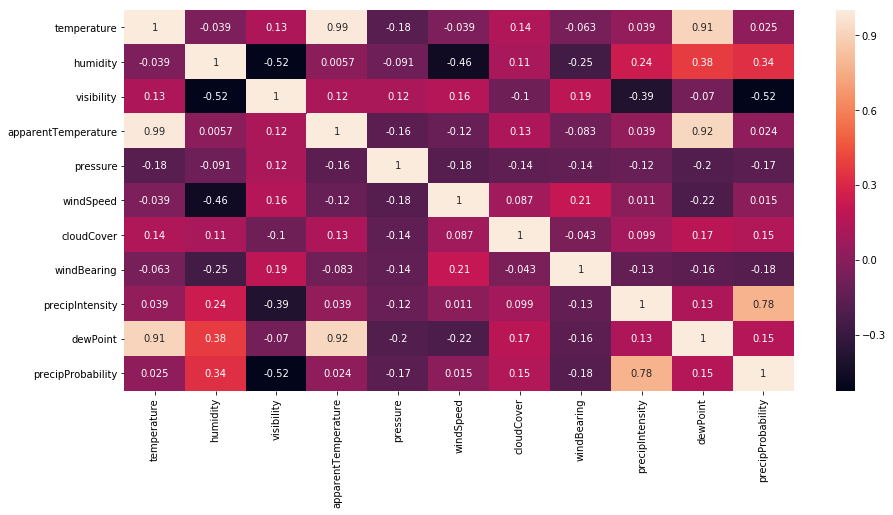

In [45]:
ply.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)

In [46]:
df.to_csv('/home/obin/Desktop/Project/Dataset/Weather/HomeF/result_v2.csv')